# Task 1: Customer Segmentation using K-Means
## Author Name: Muhammad Shoaib Sattar

## Import Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Load the Dataset

In [3]:

df = pd.read_csv("Mall_Customers.csv")  # Replace with your actual path if needed
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#  Exploratory Data Analysis (EDA)

### Rename Column

In [4]:
# Rename Genre column to Gender Column
df=df.rename(columns={'Genre': 'Gender'})

In [5]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Shape and types
df.shape

(200, 5)

In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
# Null values check
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
# Summary statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
# check for duplicates
df.duplicated().sum()

0

### Distribution plots for Age

<Axes: xlabel='Age', ylabel='Count'>

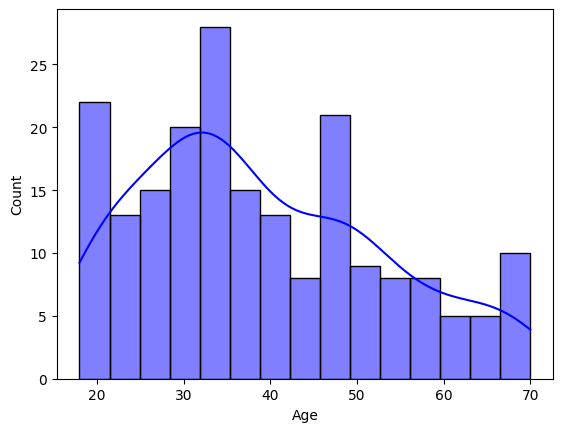

In [11]:
sns.histplot(df['Age'], bins=15, kde=True,color='blue')

### Distribution plots for Income

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

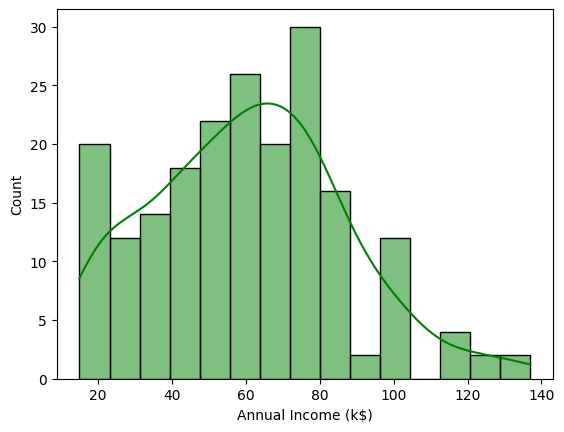

In [12]:
sns.histplot(df['Annual Income (k$)'],bins=15,kde=True,color='green')

### Distribution plots for Spending Score

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

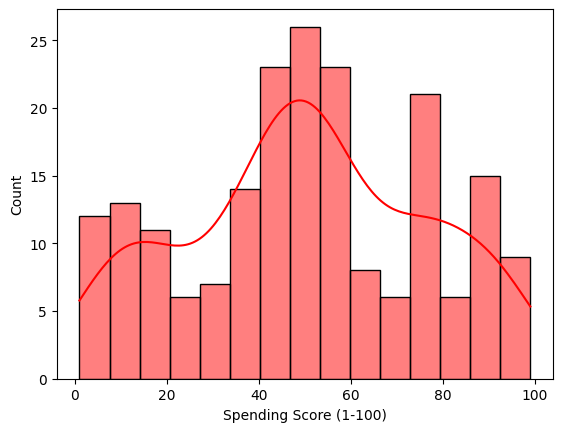

In [13]:
sns.histplot(df['Spending Score (1-100)'],bins=15,kde=True,color='red')

###   Annual Income vs  Spending Score (Bubble Size = Age) Using Plotly

In [14]:
import plotly.express as px

# Scatter plot with bubble size = Age and color = Gender
fig = px.scatter(
    df,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    size="Age",                      # Bubble size represents Age
    color="Gender",                  # Color represents Gender
    hover_data=["CustomerID"],      # Show CustomerID on hover
    title=" Annual Income vs Spending Score (Bubble Size = Age)"
)

fig.show()



## Data Wranangling

In [15]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Outliers Remove

<Axes: ylabel='Annual Income (k$)'>

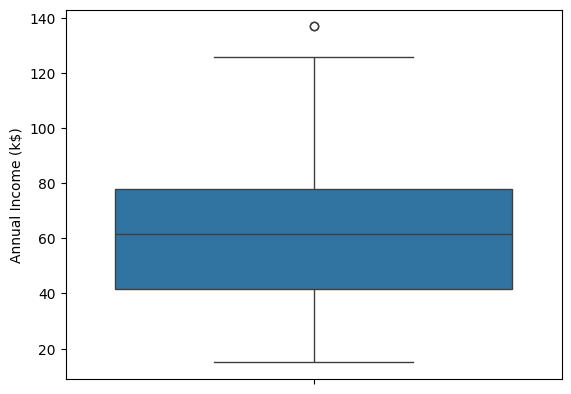

In [16]:
# check ouliers of Annual Income  using Boxplot
sns.boxplot(data=df,y=df['Annual Income (k$)'])

<Axes: ylabel='Spending Score (1-100)'>

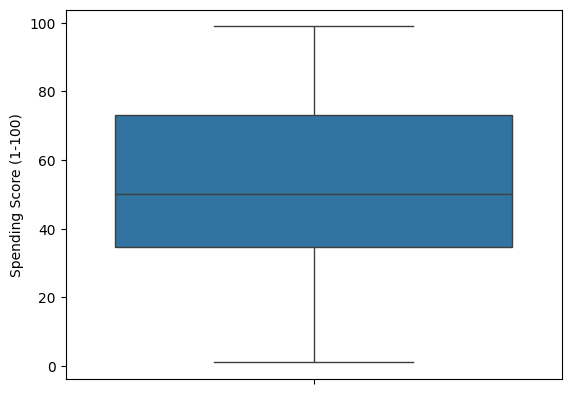

In [17]:
# check ouliers of Spending Score  using Boxplot
sns.boxplot(data=df,y=df['Spending Score (1-100)'])

<Axes: ylabel='Age'>

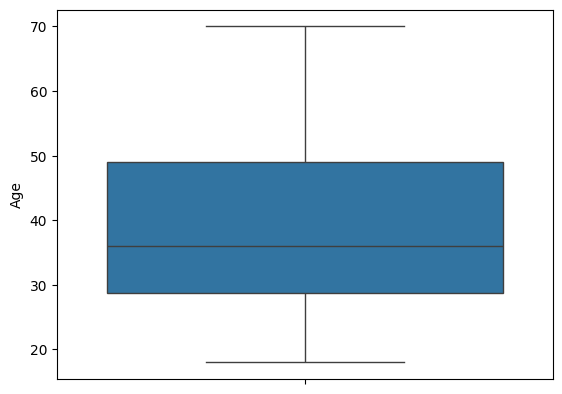

In [18]:
# check ouliers of age using Boxplot
sns.boxplot(data=df,y=df['Age'])

## Summary:
ouliers is Already remove but short outliers in Annual Income (k$) Column but is Accurate

### Label Encoding of Column Genre

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])

In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### Correlation Matrix

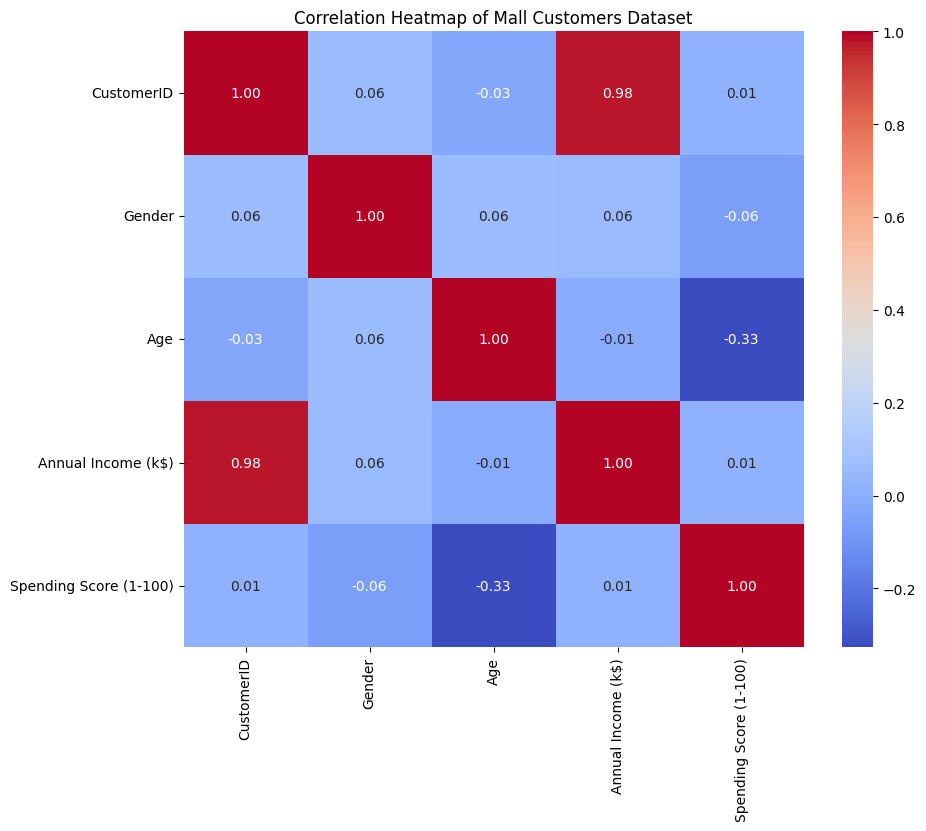

In [21]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Mall Customers Dataset")
plt.show()

In [22]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### Feature scaling  using Minmaxscaler

In [23]:
from sklearn.preprocessing import MinMaxScaler
# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Scale the data to [0, 1] range


## Elbow method

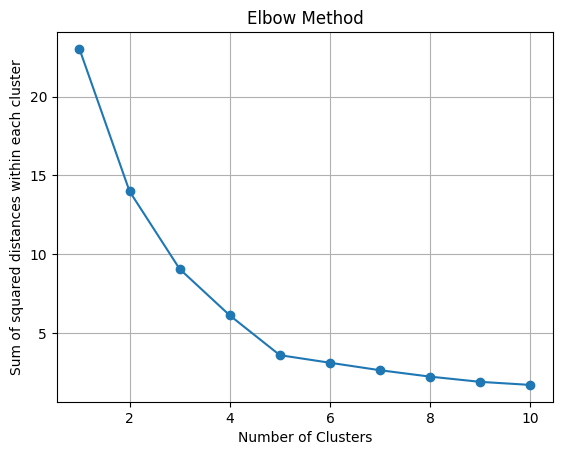

In [24]:
import warnings
warnings.filterwarnings("ignore")  # Disables warning messages during execution

wcss = []  # Creates empty list to store Within-Cluster-Sum-of-Squares values

for k in range(1, 11):  # Tests cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)  # Creates KMeans model with current k
    kmeans.fit(X_scaled)  # Fits model to scaled data (X_scaled)
    wcss.append(kmeans.inertia_)  # Records WCSS (inertia) for this cluster count

plt.plot(range(1, 11), wcss, marker='o')  # Plots WCSS values with dot markers
plt.title("Elbow Method")  # Adds plot title
plt.xlabel("Number of Clusters")  # Labels x-axis
plt.ylabel("Sum of squared distances within each cluster")  # Labels y-axis
plt.grid(True)  # Enables grid lines
plt.show()  # Displays the plot

### Summary
#### After k=5, WCSS decreases more slowly, meaning you're adding complexity without much gain.
#### k=5:	Likely the best number of clusters in your dataset
#### The elbow is the point where the curve bends or flattens, suggesting that adding more clusters doesn’t improve performance significantly.

## Apply KMeans with n_cluster=5

In [25]:
#  Apply KMeans 
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

## Visualize using Seaborn and matplotlib

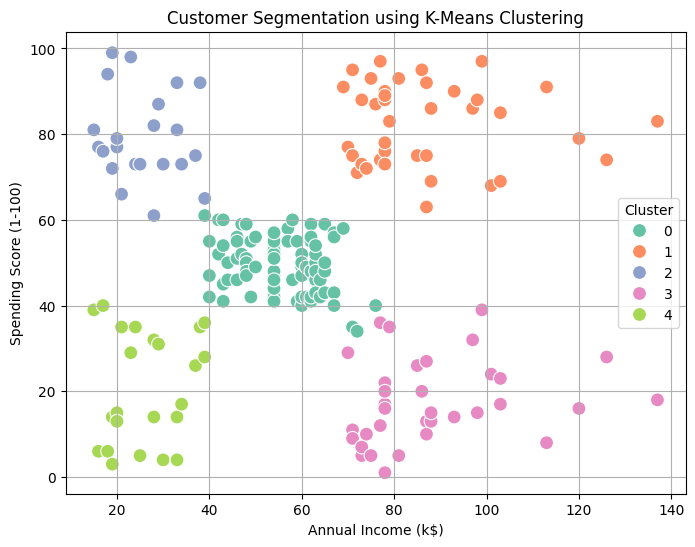

In [29]:
# Create a figure with specified size (8x6 inches)
plt.figure(figsize=(8, 6))

# Create scatter plot using seaborn (sns)
sns.scatterplot(
    data=df,                # Use the DataFrame df
    x='Annual Income (k$)',  # Put annual income on the x-axis
    y='Spending Score (1-100)', # Put spending score on the y-axis
    hue=df['Cluster'],         # Color points by cluster assignment
    palette='Set2',            # Use color palette 'Set2'
    s=100                      # Set point size to 100
)

# Add plot title
plt.title('Customer Segmentation using K-Means Clustering')

# Label X-axis 
plt.xlabel('Annual Income (k$)')

# Label Y-axis 
plt.ylabel('Spending Score (1-100)')

# Enable grid lines
plt.grid(True)

# Display the plot
plt.show()

In [27]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4


## Make a 2D plot using plotly

In [28]:
# Import Plotly Express library for easy plotting (short name 'px')
import plotly.express as px

# Create a scatter plot using Plotly Express
fig = px.scatter(
    df,  # Use the dataframe 'df' as our data source
    x='Annual Income (k$)',  # Put annual income on the x-axis
    y='Spending Score (1-100)',  # Put spending score on the y-axis
    color='Cluster',  # Color dots differently for each cluster group
    title='Customer Segmentation using K-Means Clustering',  # Plot title
    color_discrete_sequence=px.colors.qualitative.Set2,  # Use a nice color set
    hover_data=['CustomerID', 'Age', 'Gender']  # Show this info when hovering
)

# Make all dots bigger (size 10) for better visibility
fig.update_traces(marker=dict(size=10))

# Customize the plot layout
fig.update_layout(
    xaxis_title='Annual Income (k$)',  # Label for x-axis
    yaxis_title='Spending Score (1-100)',  # Label for y-axis
    template='plotly_white'  # Use clean white background style
)

# Finally, display the plot
fig.show()


# Customer Segmentation Analysis 

##  Cluster Visualization Overview
- **X-axis**: Annual Income (in thousands of dollars, range $40k-$140k)
- **Y-axis**: Spending Score (1-100 scale)
- **5 Clusters Identified**: 0 through 4

##  Detailed Cluster Breakdown

###  Cluster 0 (High Income, Moderate Spending)

Income Range: $100k-$140k
Spending Score: 60-80
Profile: Affluent Savers
Characteristics:
- Top 20% earners
- Spend 60-80% of maximum observed spending
- Likely invest/save 20-40% of disposable income
###  Cluster 1 (Middle Income, High Spending)
Income Range: $60k-$100k  
Spending Score: 80-100
Profile: Lifestyle Spenders
Characteristics:
- Spend at maximum capacity
- Likely urban millennials/DINKs
- Prioritize experiences over savings
###  Cluster 2 (Low Income, Low Spending)
Income Range: $40k-$60k
Spending Score: 20-40
Profile: Necessity Shoppers
Characteristics:
- Minimum wage/service workers
- Spend only on essentials
- Highly price-sensitive
### Cluster 3 (Middle Income, Low Spending)
Income Range: $60k-$80k  
Spending Score: 20-40
Profile: Conservative Families
Characteristics:
- Suburban households
- Mortgage/education priorities
- Conscious spending habits
### Cluster 4 (High Income, Max Spending)
Income Range: $100k-$120k
Spending Score: 90-100
Profile: Luxury Consumers
Characteristics:
- Top 1% spending behavior
- Status-driven purchases
- Brand-conscious

# Final Report: Customer Segmentation using K-Means Clustering  

## Project Overview  
This report presents the results of a **K-Means clustering** analysis performed to segment customers based on two key variables:  
- **Annual Income (k$)**  
- **Operating Score (1-100)**  

The objective was to identify distinct customer groups for targeted marketing strategies.  

---

## Methodology  
- **Algorithm**: K-Means Clustering (unsupervised learning).  
- **Data Preprocessing**: Features were scaled to ensure uniformity.  
- **Optimal Cluster Selection**: Determined using the **Elbow Method**  
- **Visualization**: A scatter plot was generated to display clusters, with **Annual Income (k$)** on the x-axis and **Operating Score (1-100)** on the y-axis.  

---

## Results  
The clustering analysis revealed **5 distinct customer segments**

### Cluster Descriptions:  
1. **Low Income, Low Operating Score (Bottom-Left)**  
   - **Characteristics**: Low annual income (<$20k) and low operating scores (<40).  
   - **Interpretation**: Likely inactive or minimally engaged customers.  

2. **Low Income, High Operating Score (Top-Left)**  
   - **Characteristics**: Low income (<$20k) but high operating scores (>80).  
   - **Interpretation**: Highly engaged but financially constrained customers.  

3. **Middle Income, Middle Operating Score (Center)**  
   - **Characteristics**: Moderate income ($20k–$60k) and mid-range operating scores (40–60).  
   - **Interpretation**: Average customers with balanced engagement.  

4. **High Income, Low Operating Score (Bottom-Right)**  
   - **Characteristics**: High income (>$60k) but low operating scores (<40).  
   - **Interpretation**: Affluent but disengaged customers (potential for retention strategies).  

5. **High Income, High Operating Score (Top-Right)**  
   - **Characteristics**: High income (>$60k) and high operating scores (>80).  
   - **Interpretation**: Ideal customers—high value and highly engaged.  

---

## Key Insights  
1. **Target Prioritization**:  
   - **Cluster 5 (High/High)**: Premium segment for loyalty programs.  
   - **Cluster 2 (Low/High)**: Engage with low-cost, high-value offers.  
2. **Anomalies**:  
   - **Cluster 4 (High/Low)**: Investigate reasons for disengagement (e.g., poor service fit).  
3. **Strategy**:  
   - Customize campaigns per cluster (e.g., discounts for Cluster 1, exclusives for Cluster 5).  

---

## Limitations  
- **Feature Dependency**: Segmentation is based solely on income and operating score; adding demographics could refine clusters.  
- **Dynamic Data**: Customer behavior changes over time; periodic re-clustering is advised.  

---

## Conclusion  
The K-Means clustering successfully identified actionable customer segments. Recommendations include:  
- **Retention efforts** for Cluster 4.  
- **Upselling** to Cluster 3.  
- **Further analysis** to validate cluster stability (e.g., using PCA or alternative algorithms).  
